In [1]:
# %load ../jupyter_setup.txt
# Convenient jupyter setup
%load_ext autoreload
%load_ext line_profiler
%autoreload 2
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False 

In [2]:
import logging
import os
import pickle
from typing import List, Tuple, Type

import numpy as np
import geopandas as gpd
import rasterio
import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader

from src.data_loading.rasterio_utils import get_thumbnail
from src.unet.satellite_image import SatelliteImage
from src.unet.dataloader import SatelliteDataset, LabelledSatelliteDataset
from rasterio.plot import reshape_as_raster, reshape_as_image
import xarray as xr

from src.constants import SRC_PATH, GWS_DATA_DIR, WGS84, UTM35N, SENTINEL_DIR
SENTINEL_POLESIA_DIR = SENTINEL_DIR / "Polesia_10m"
SENTINEL_CHERNOBYL_DIR = SENTINEL_DIR / "Chernobyl_10m"

/home/users/svm/Code/gtc-biodiversity/env/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# Cut out validation labels

In [4]:
burned_classes =  GWS_DATA_DIR / "polesia_burned_superclasses_all_touched_10m.tif"

In [5]:
burned_vals = xr.open_rasterio(burned_classes, chunks={"band": 1, "x": 256, "y": 256})

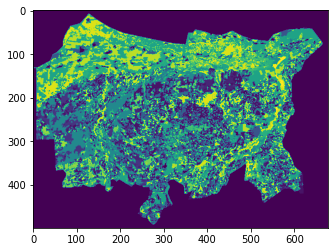

In [7]:
polesia_raster_thumbnail = get_thumbnail(rasterio.open(burned_classes), height=500)
plt.imshow(polesia_raster_thumbnail);

In [10]:
label_array = burned_vals.compute()

In [16]:
# Get fraction of data points:
np.sum(label_array.data > 0) / np.prod(label_array.shape)

0.6001198582283552

In [23]:
pixel_counts = [np.sum(label_array.data == i) for i in range(21)]

<BarContainer object of 20 artists>

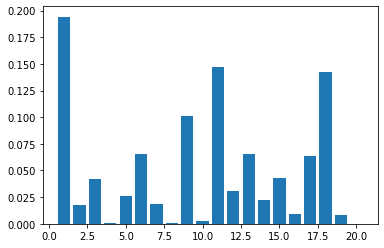

In [28]:
plt.bar(range(1,21), pixel_counts[1:] / np.sum(label_array.data > 0)) 